# 2. 사칙연산
#### lv.5
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/1843)

In [15]:
def plus(a :set, b :set):
    r = set()
    for a_ in a:
        for b_ in b:
            r.add(a_+b_)
    return r
def minus(a :set, b :set):
    r = set()
    for a_ in a:
        for b_ in b:
            r.add(a_-b_)
    return r
oper = {'+':plus, '-':minus}
# 각 부분 집합들이 가능한 결과들을 리스트로 저장할 딕셔너리
# key : 부분집합을 str로 변환한 결과, value : set(부분집합의 가능한 결과들)
# set을 사용한 이유 : 중복된 결과들을 제거하기 위해
dict_ = {}

def calcul(arr):
    # key로 사용하기 위해 리스트를 문자열로 변환
    str_arr = ''.join(map(str, arr))
    # 이미 계산한 부분집합이면 그 값을 반환
    if dict_.get(str_arr) != None:
        return dict_[str_arr]
    # 부분집합의 길이가 1이면 그 값을 반환
    if len(arr) == 1:
        return arr
    # 계산한 적 없는 부분집합이면 결과를 저장할 세트 생성
    dict_[str_arr] = set()
    # 모든 연산자가 +인 경우-> 결합법칙으로 모든 경우의 값이 같음.
    if '-' not in arr[1::2]:
        dict_[str_arr] = set([sum(arr[::2])])
        return dict_[str_arr]
    # 각 연산자를 기준으로 왼쪽과 오른쪽으로 나누어 가능한 결과들을 구함.
    # 각 결과들끼리 연산자를 적용하여 가능한 결과들을 구함.
    for i in range(1, len(arr), 2):
        left = calcul(arr[:i])
        right = calcul(arr[i+1:])
        dict_[str_arr].update(oper[arr[i]](left, right))
    
    return dict_[str_arr]

def solution(arr):
    # 문자열로 받은 arr을 숫자부분은 int형으로 변환
    for i in range(0, len(arr), 2):
        arr[i] = int(arr[i])
    # arr이 가능한 모든 결과들을 구함.
    result = calcul(arr)
    # 그 중 최댓값을 반환
    return max(result)

In [16]:
arr= ["1", "-", "3", "+", "5", "-", "8"]
for i in range(0, len(arr), 2):
    arr[i] = int(arr[i])
str_arr = ''.join(map(str, arr))
str_arr

'1-3+5-8'

In [17]:
arr = ["1", "-", "3", "+", "5", "-", "8"]
print(solution(arr))

1


## 실패
- 딕셔너리를 이용한 메모이제이션, 재귀를 이용해 좌-우를 개별로 가능한 답들을 가져옴.
    - 시간초과로 인한 실패
- 어떤 부분에서 최적화가 필요할지 고민이 필요할듯

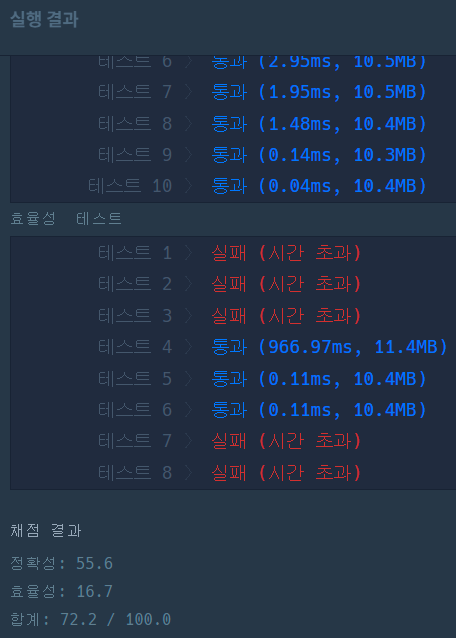

In [28]:
import numpy as np
import time
n=10000
arr1 = np.random.randint(20, size=(n,1))
arr2 = np.random.randint(20, size=(n-1,1))
start = time.time()
arr3 = arr1+arr2.T
arr3 = arr3.flatten()
end = time.time()
print(end-start)
arr3.size

0.20833349227905273


99990000

In [29]:
import time
arr1 = list(np.random.randint(20, size=n))
arr2 = list(np.random.randint(20, size=n-1))
arr3 = []
start = time.time()
for a1 in arr1:
    for a2 in arr2:
        arr3.append(a1+a2)
end = time.time()
print(end-start)
len(arr3)

11.404464483261108


99990000

In [37]:
import time
arr1 = list(np.random.randint(20, size=n))
arr2 = list(np.random.randint(20, size=n-1))
start = time.time()
arr1 = np.array(arr1).reshape(len(arr1),1)
arr2 = np.array(arr2).reshape(len(arr2),1)
arr3 = arr1+arr2.T
arr3 = list(arr3.flatten())
end = time.time()
print(end-start)
len(arr3)

2.9106040000915527


99990000

In [46]:
arr1 = np.array([1,2,3,4,5])
arr2 = np.array([1,2,3,4,6])
np.unique(arr1+arr2)
arr3 = np.array([1,2,3,4,5,6])

In [47]:
arr3.reshape(6,1)
arr3.flatten()

array([1, 2, 3, 4, 5, 6])

In [71]:
type(None) == type(None)

True

In [78]:
import numpy as np

def plus(a :np.array, b :np.array):
    r = np.array([], dtype=np.int64)
    # 모든 각각원소의 합을 구하기위해 2차원 배열로 변환
    a = a.reshape(len(a),1)
    b = b.reshape(len(b),1)
    r = a+b.T
    r = np.unique(r.flatten())
    return r
def minus(a :np.array, b :np.array):
    r = np.array([], dtype=np.int64)
    # 모든 각각원소의 차를 구하기위해 2차원 배열로 변환
    a = a.reshape(len(a),1)
    b = b.reshape(len(b),1)
    r = a-b.T
    r = np.unique(r.flatten())
    return r
oper = {'+':plus, '-':minus}
# 각 부분 집합들이 가능한 결과들을 리스트로 저장할 딕셔너리
# key : 부분집합을 str로 변환한 결과, value : set(부분집합의 가능한 결과들)
# set을 사용한 이유 : 중복된 결과들을 제거하기 위해
dict_ = {}

def calcul(arr):
    # key로 사용하기 위해 리스트를 문자열로 변환
    str_arr = ''.join(map(str, arr))
    # 이미 계산한 부분집합이면 그 값을 반환
    # np.array는 != == 연산자 사용기 각 원소별로 비교하여 bool형태로 반환
    # 내가 알고싶은건 배열이 반환되었는지 여부이므로, type을 사용하여 비교
    if type(dict_.get(str_arr)) != type(None):
        return dict_[str_arr]
    # 부분집합의 길이가 1이면 그 값을 반환
    if len(arr) == 1:
        return np.array(arr, dtype=np.int64)
    # 계산한 적 없는 부분집합이면 결과를 저장할 np.array 생성
    dict_[str_arr] = np.array([], dtype=np.int64)
    # 모든 연산자가 +인 경우-> 결합법칙으로 모든 경우의 값이 같음.
    if '-' not in arr[1::2]:
        dict_[str_arr] = np.array([sum(arr[::2])], dtype=np.int64)
        return dict_[str_arr]
    # 각 연산자를 기준으로 왼쪽과 오른쪽으로 나누어 가능한 결과들을 구함.
    # 각 결과들끼리 연산자를 적용하여 가능한 결과들을 구함.
    for i in range(1, len(arr), 2):
        left = calcul(arr[:i])
        right = calcul(arr[i+1:])
        # np.union1d : 합집합을 구하는 함수
        dict_[str_arr] = np.union1d(dict_[str_arr], oper[arr[i]](left, right))
    
    return dict_[str_arr]

def solution(arr):
    # 문자열로 받은 arr을 숫자부분은 int형으로 변환
    for i in range(0, len(arr), 2):
        arr[i] = int(arr[i])
    # arr이 가능한 모든 결과들을 구함.
    result = calcul(arr)
    # 그 중 최댓값을 반환
    # np.int64형을 반환할 경우 프로그래머스에서 문제가 생김. -> int형으로 변환해줌
    return int(max(result))

In [79]:
arr = ["1", "-", "3", "+", "5", "-", "8"]
print(solution(arr))

1


In [80]:
arr = ["5", "-", "3", "+", "1", "+", "2", "-", "4"]
print(solution(arr))

3


In [81]:
from pprint import pprint
pprint(dict_)

{'1+2': array([3], dtype=int64),
 '1+2-4': array([-1], dtype=int64),
 '1-3': array([-2], dtype=int64),
 '1-3+5': array([-7,  3], dtype=int64),
 '1-3+5-8': array([-15,  -5,   1], dtype=int64),
 '2-4': array([-2], dtype=int64),
 '3+1': array([4], dtype=int64),
 '3+1+2': array([6], dtype=int64),
 '3+1+2-4': array([2], dtype=int64),
 '3+5': array([8], dtype=int64),
 '3+5-8': array([0], dtype=int64),
 '5-3': array([2], dtype=int64),
 '5-3+1': array([1, 3], dtype=int64),
 '5-3+1+2': array([-1,  3,  5], dtype=int64),
 '5-3+1+2-4': array([-5, -1,  1,  3], dtype=int64),
 '5-8': array([-3], dtype=int64)}


## 실패
- 넘파이 배열과 벡터연산을 활용해 시간을 반으로 줄임
    - 여전히 시간초과 발생.

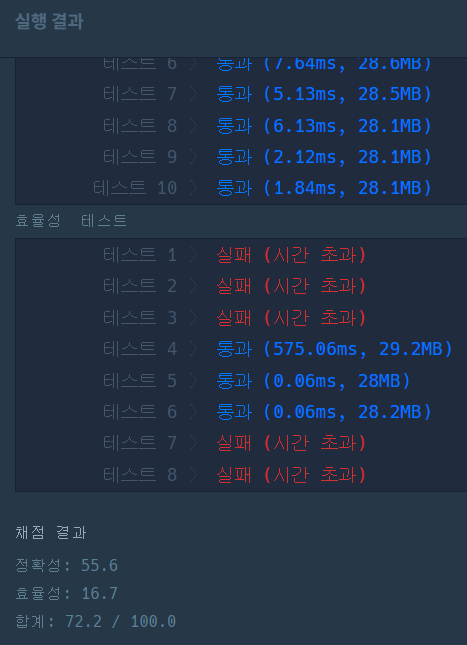

1-3+5-8


([1, 3, 5], ['-', '+'], [8], [])

In [82]:
import numpy as np
# 모든 각각원소의 차를 구하기위해 2차원 배열로 변환, 벡터연산해주는 함수
# 
def plus(a :np.array, b :np.array):
    r = np.array([], dtype=np.int32)
    a = a.reshape(len(a),1)
    b = b.reshape(len(b),1)
    r = a+b.T
    r = np.unique(r.flatten())
    return r
def minus(a :np.array, b :np.array):
    r = np.array([], dtype=np.int32)
    a = a.reshape(len(a),1)
    b = b.reshape(len(b),1)
    r = a-b.T
    r = np.unique(r.flatten())
    return r
oper = {'+':plus, '-':minus}
# 각 부분 집합들이 가능한 결과들을 리스트로 저장할 딕셔너리
# key : 부분집합을 str로 변환한 결과, value : set(부분집합의 가능한 결과들)
# set을 사용한 이유 : 중복된 결과들을 제거하기 위해
dict_ = None

def calcul(nums, ops):
    # key로 사용하기 위해 리스트를 문자열로 변환
    str_arr = ''.join(map(str, nums)) + ''.join(ops)
    # 이미 계산한 부분집합이면 그 값을 반환
    # np.array는 != == 연산자 사용기 각 원소별로 비교하여 bool형태로 반환
    # 내가 알고싶은건 배열이 반환되었는지 여부이므로, type을 사용하여 비교
    if type(dict_.get(str_arr)) != type(None):
        return dict_[str_arr]
    # 계산할 연산자가 없으면 그대로 반환
    if ops.size == 0:
        dict_[str_arr] = np.array(nums, dtype=np.int32)
        return dict_[str_arr]
    # 계산할 연산자가 1개이면 그대로 계산후 반환
    if ops.size == 1:
        if ops[0] == '+':
            dict_[str_arr] = np.array([sum(nums)], dtype=np.int32)
        else:
            dict_[str_arr] = np.array([nums[0]-nums[1]], dtype=np.int32)
        return dict_[str_arr]
    # 계산한 적 없는 부분집합이면 결과를 저장할 np.array 생성
    dict_[str_arr] = np.array([], dtype=np.int32)
    # 모든 연산자가 +인 경우-> 결합법칙으로 모든 경우의 값이 같음.
    if '-' not in ops:
        dict_[str_arr] = np.array([sum(nums)], dtype=np.int32)
        return dict_[str_arr]
    # 각 연산자를 기준으로 왼쪽과 오른쪽으로 나누어 가능한 결과들을 구함.
    # 각 결과들끼리 연산자를 적용하여 가능한 결과들을 구함.
    for i in range(len(ops)):
        left = calcul(nums[:i+1], ops[:i])
        right = calcul(nums[i+1:], ops[i+1:])
        # np.union1d : 합집합을 구하는 함수
        dict_[str_arr] = np.union1d(dict_[str_arr], oper[ops[i]](left, right))
    
    return dict_[str_arr]

def solution(arr):
    global dict_
    dict_ = {}
    # 숫자열과 연산자를 분리
    nums, ops = arr[::2], np.array(arr[1::2])
    # 수열을 모두 int형으로 변환
    nums = np.array(list(map(int, nums)))
    # arr이 가능한 모든 결과들을 구함.
    result = calcul(nums, ops)
    # 그 중 최댓값을 반환
    # np.int64형을 반환할 경우 프로그래머스에서 문제가 생김. -> int형으로 변환해줌
    return int(result.max())

In [83]:
arr = ["1", "-", "3", "+", "5", "-", "8"]
nums, ops = arr[::2], np.array(arr[1::2])
nums = np.array(list(map(int, nums)), np.int64)
str_arr = ''.join(map(str, nums)) + ''.join(ops)
str_arr

'1358-+-'

In [84]:
np.array([1,2,3])

array([1, 2, 3])

In [60]:
dict_ = {}
arr = ["1", "-", "3", "+", "5", "-", "8"]
print(solution(arr))

1


In [61]:
dict_ = {}
arr = ["5", "-", "3", "+", "1", "+", "2", "-", "4"]
print(solution(arr))

3


In [87]:
import time

n=50
nums = [str(i) for i in range(1, n+1)]
ops = ['-'] * (n-1)
arr = []
for i in range(n-1):
    arr.append(str(nums[i]))
    arr.append(ops[i])
arr.append(str(nums[-1]))
# print(arr, type(arr))

In [88]:
start = time.time()
print(solution(arr))
end = time.time()
print(end-start)

1271
1.2972757816314697


In [79]:
start = time.time()
print(solution(arr))
end = time.time()
print(end-start)

21
0.0


## 실패
- 숫자와 연산자를 나누어줌 -> 슬라이싱에서 속도를 늘릴생각.
    - 속도가 조금 줄어듦.
    - 근본적인 해결책은 되지 못함

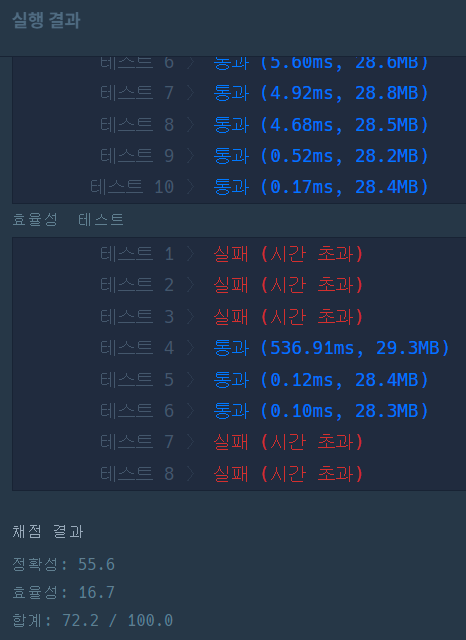

In [ ]:
import numpy as np
# 모든 각각원소의 차를 구하기위해 2차원 배열로 변환, 벡터연산해주는 함수
# 
def plus(a :np.array, b :np.array):
    r = np.array([], dtype=np.int32)
    a = a.reshape(len(a),1)
    b = b.reshape(len(b),1)
    r = a+b.T
    r = np.unique(r.flatten())
    r = np.array([min(r), max(r)], dtype=np.int32)
    return r
def minus(a :np.array, b :np.array):
    r = np.array([], dtype=np.int32)
    a = a.reshape(len(a),1)
    b = b.reshape(len(b),1)
    r = a-b.T
    r = np.unique(r.flatten())
    r = np.array([min(r), max(r)], dtype=np.int32)
    return r
oper = {'+':plus, '-':minus}
# 각 부분 집합들이 가능한 결과들을 리스트로 저장할 딕셔너리
# key : 부분집합을 str로 변환한 결과, value : set(부분집합의 가능한 결과들)
# set을 사용한 이유 : 중복된 결과들을 제거하기 위해
dict_ = None

def calcul(nums, ops):
    # key로 사용하기 위해 리스트를 문자열로 변환
    str_arr = ''.join(map(str, nums)) + ''.join(ops)
    # 이미 계산한 부분집합이면 그 값을 반환
    # np.array는 != == 연산자 사용기 각 원소별로 비교하여 bool형태로 반환
    # 내가 알고싶은건 배열이 반환되었는지 여부이므로, type을 사용하여 비교
    if type(dict_.get(str_arr)) != type(None):
        return dict_[str_arr]
    # 계산할 연산자가 없으면 그대로 반환
    if ops.size == 0:
        dict_[str_arr] = np.array(nums, dtype=np.int32)
        return dict_[str_arr]
    # 계산할 연산자가 1개이면 그대로 계산후 반환
    if ops.size == 1:
        if ops[0] == '+':
            dict_[str_arr] = np.array([sum(nums)], dtype=np.int32)
        else:
            dict_[str_arr] = np.array([nums[0]-nums[1]], dtype=np.int32)
        return dict_[str_arr]
    # 계산한 적 없는 부분집합이면 결과를 저장할 np.array 생성
    dict_[str_arr] = np.array([], dtype=np.int32)
    # 모든 연산자가 +인 경우-> 결합법칙으로 모든 경우의 값이 같음.
    if '-' not in ops:
        dict_[str_arr] = np.array([sum(nums)], dtype=np.int32)
        return dict_[str_arr]
    # 각 연산자를 기준으로 왼쪽과 오른쪽으로 나누어 가능한 결과들을 구함.
    # 각 결과들끼리 연산자를 적용하여 가능한 결과들을 구함.
    for i in range(len(ops)):
        left = calcul(nums[:i+1], ops[:i])
        right = calcul(nums[i+1:], ops[i+1:])
        # np.union1d : 합집합을 구하는 함수
        dict_[str_arr] = np.union1d(dict_[str_arr], oper[ops[i]](left, right))
    
    return dict_[str_arr]

def solution(arr):
    global dict_
    dict_ = {}
    # 숫자열과 연산자를 분리
    nums, ops = arr[::2], np.array(arr[1::2])
    # 수열을 모두 int형으로 변환
    nums = np.array(list(map(int, nums)))
    # arr이 가능한 모든 결과들을 구함.
    result = calcul(nums, ops)
    # 그 중 최댓값을 반환
    # np.int64형을 반환할 경우 프로그래머스에서 문제가 생김. -> int형으로 변환해줌
    return int(result.max())